In [23]:
import itertools
from torchvision.datasets import FashionMNIST

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset

from sklearn.neural_network import MLPClassifier

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font', family = 'Malgun Gothic')

from sklearn.metrics import accuracy_score, confusion_matrix

# confusion_matrix 를 예쁘게 그려짐
def plot_confusion_matrix(cm, classes, title, cmap= plt.cm.Blues):
    plt.figure(figsize=(15,15))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment = 'center',
                 color = 'red' if cm[i,j] > thresh else "black", fontsize=30)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
import warnings, itertools, time
warnings.filterwarnings(action='ignore')
import torch

In [24]:
download_root = './'

# 데이터 scaling을 위한 요소
fashion_mnist_transform = transforms.Compose([
    transforms.ToTensor(),  # 데이터 형태를 pytorch에 적합한 형태로 바꾸어 줌
    transforms.Normalize((0,0),(1.0,)) # feature들의 평균과 표준편차를 0과 1로 scaling
])

#FasionMNIST 훌련 데이터셋 다운로드
dataset = FashionMNIST(download_root, transform= fashion_mnist_transform,
                       train= True, download=True)

# 훈련데이터 셋을 50000 / 10000개 (검증용)
train_dataset, valid_dataset = torch.utils.data.random_split(dataset,[50000,10000])
test_dataset = FashionMNIST(download_root,
                            transform= fashion_mnist_transform,
                            train=False, download=True)

In [25]:
# sklean 을 이용한 인공신경망 학습
# 1. 모델 구축
model = MLPClassifier(random_state= 0, hidden_layer_sizes=(300,150),
                      activation='relu', solver='adam',
                      batch_size=100, learning_rate='constant',
                      learning_rate_init=0.001, verbose= True, early_stopping=True,
                      validation_fraction=10000/60000, n_iter_no_change=5)

In [26]:
start = time.time() # 모델 학습시간 시간 저장 28*28 = 784
model.fit(dataset.data.numpy().reshape(60000,784), dataset.targets.numpy())
print("time : ", time.time() - start)

Iteration 1, loss = 3.11359926
Validation score: 0.814300
Iteration 2, loss = 0.75751713
Validation score: 0.816200
Iteration 3, loss = 0.50127694
Validation score: 0.821300
Iteration 4, loss = 0.43941868
Validation score: 0.846700
Iteration 5, loss = 0.39560697
Validation score: 0.851300
Iteration 6, loss = 0.37205169
Validation score: 0.853900
Iteration 7, loss = 0.36607961
Validation score: 0.843500
Iteration 8, loss = 0.35520747
Validation score: 0.861200
Iteration 9, loss = 0.35455000
Validation score: 0.868700
Iteration 10, loss = 0.34538783
Validation score: 0.861400
Iteration 11, loss = 0.34765880
Validation score: 0.866300
Iteration 12, loss = 0.33600247
Validation score: 0.870600
Iteration 13, loss = 0.33251646
Validation score: 0.858100
Iteration 14, loss = 0.31968620
Validation score: 0.856300
Iteration 15, loss = 0.32196734
Validation score: 0.869400
Iteration 16, loss = 0.31851119
Validation score: 0.874200
Iteration 17, loss = 0.30589689
Validation score: 0.870600
Iterat

<function matplotlib.pyplot.show(close=None, block=None)>

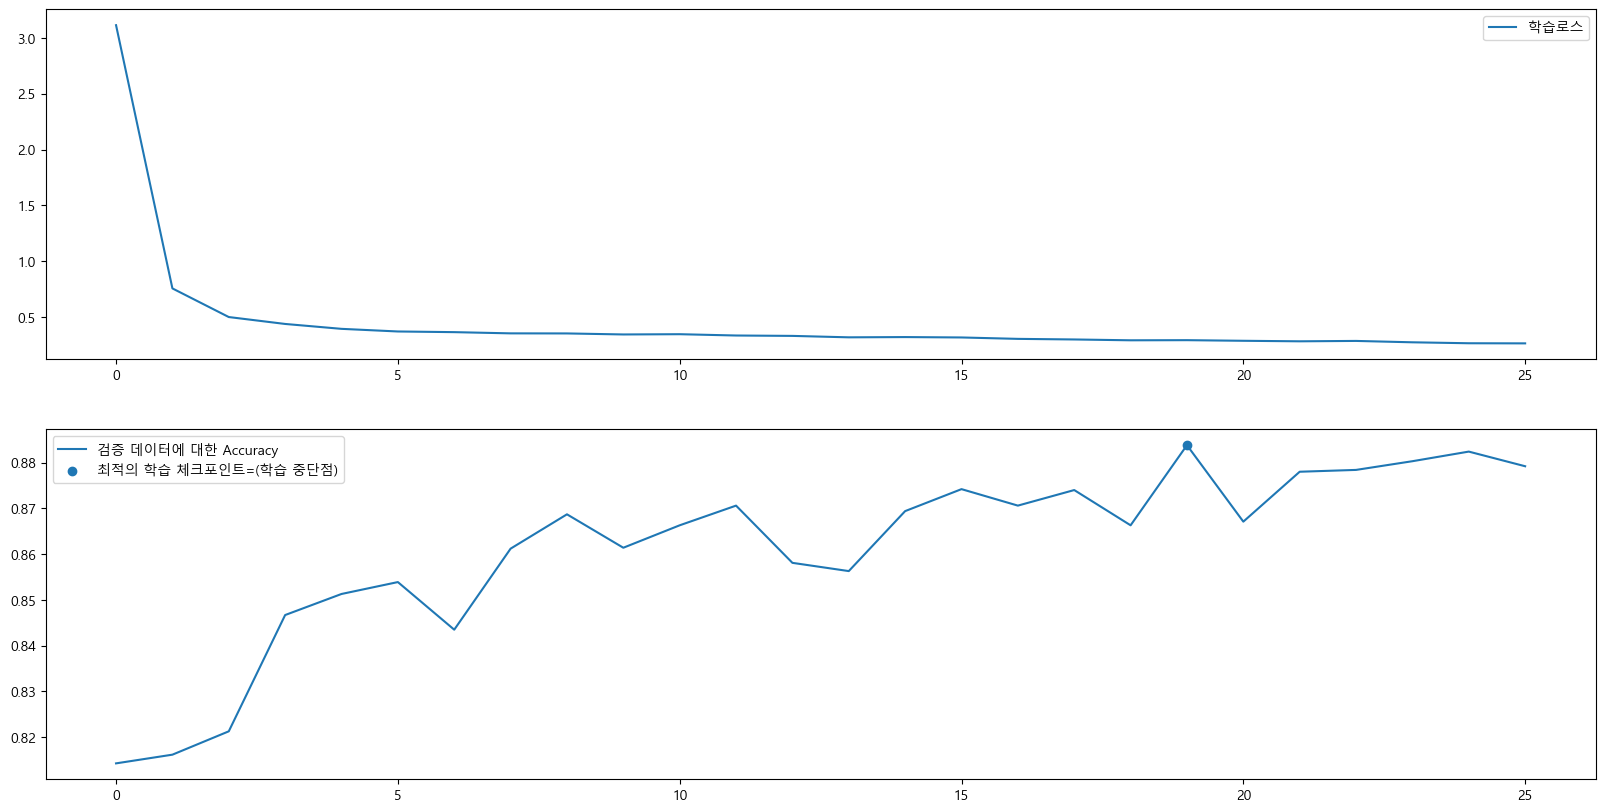

In [27]:
# 모델의 training loss
train_loss = model.loss_curve_
#그래프 배경화면 만들기
f, axs = plt.subplots(2,1,figsize=(20,10))

axs[0].plot(train_loss, label='학습로스')
axs[0].legend()

# 검증용 데이터에 대한 Accuracy 변동 관찰하기
axs[1].plot(model.validation_scores_,label='검증 데이터에 대한 Accuracy')
axs[1].scatter(np.argmax(model.validation_scores_),np.max(model.validation_scores_),
               label='최적의 학습 체크포인트=(학습 중단점)')
axs[1].legend()
plt.show

In [28]:
# 예측 Accuracy 확인하기
train_accuracy = accuracy_score(y_pred=model.predict(dataset.data.numpy().reshape(60000, -1)),
                                y_true = dataset.targets.numpy())
test_accuracy = accuracy_score(y_pred=model.predict(test_dataset.data.numpy().reshape(10000,-1)),
                               y_true= test_dataset.targets.numpy())
print(f"훈련 데이터셋 정확도 : {train_accuracy:.3f}",
      f"테스트용 데이터셋 정확도 : {test_accuracy:.3f}", sep=" | ")

훈련 데이터셋 정확도 : 0.901 | 테스트용 데이터셋 정확도 : 0.873


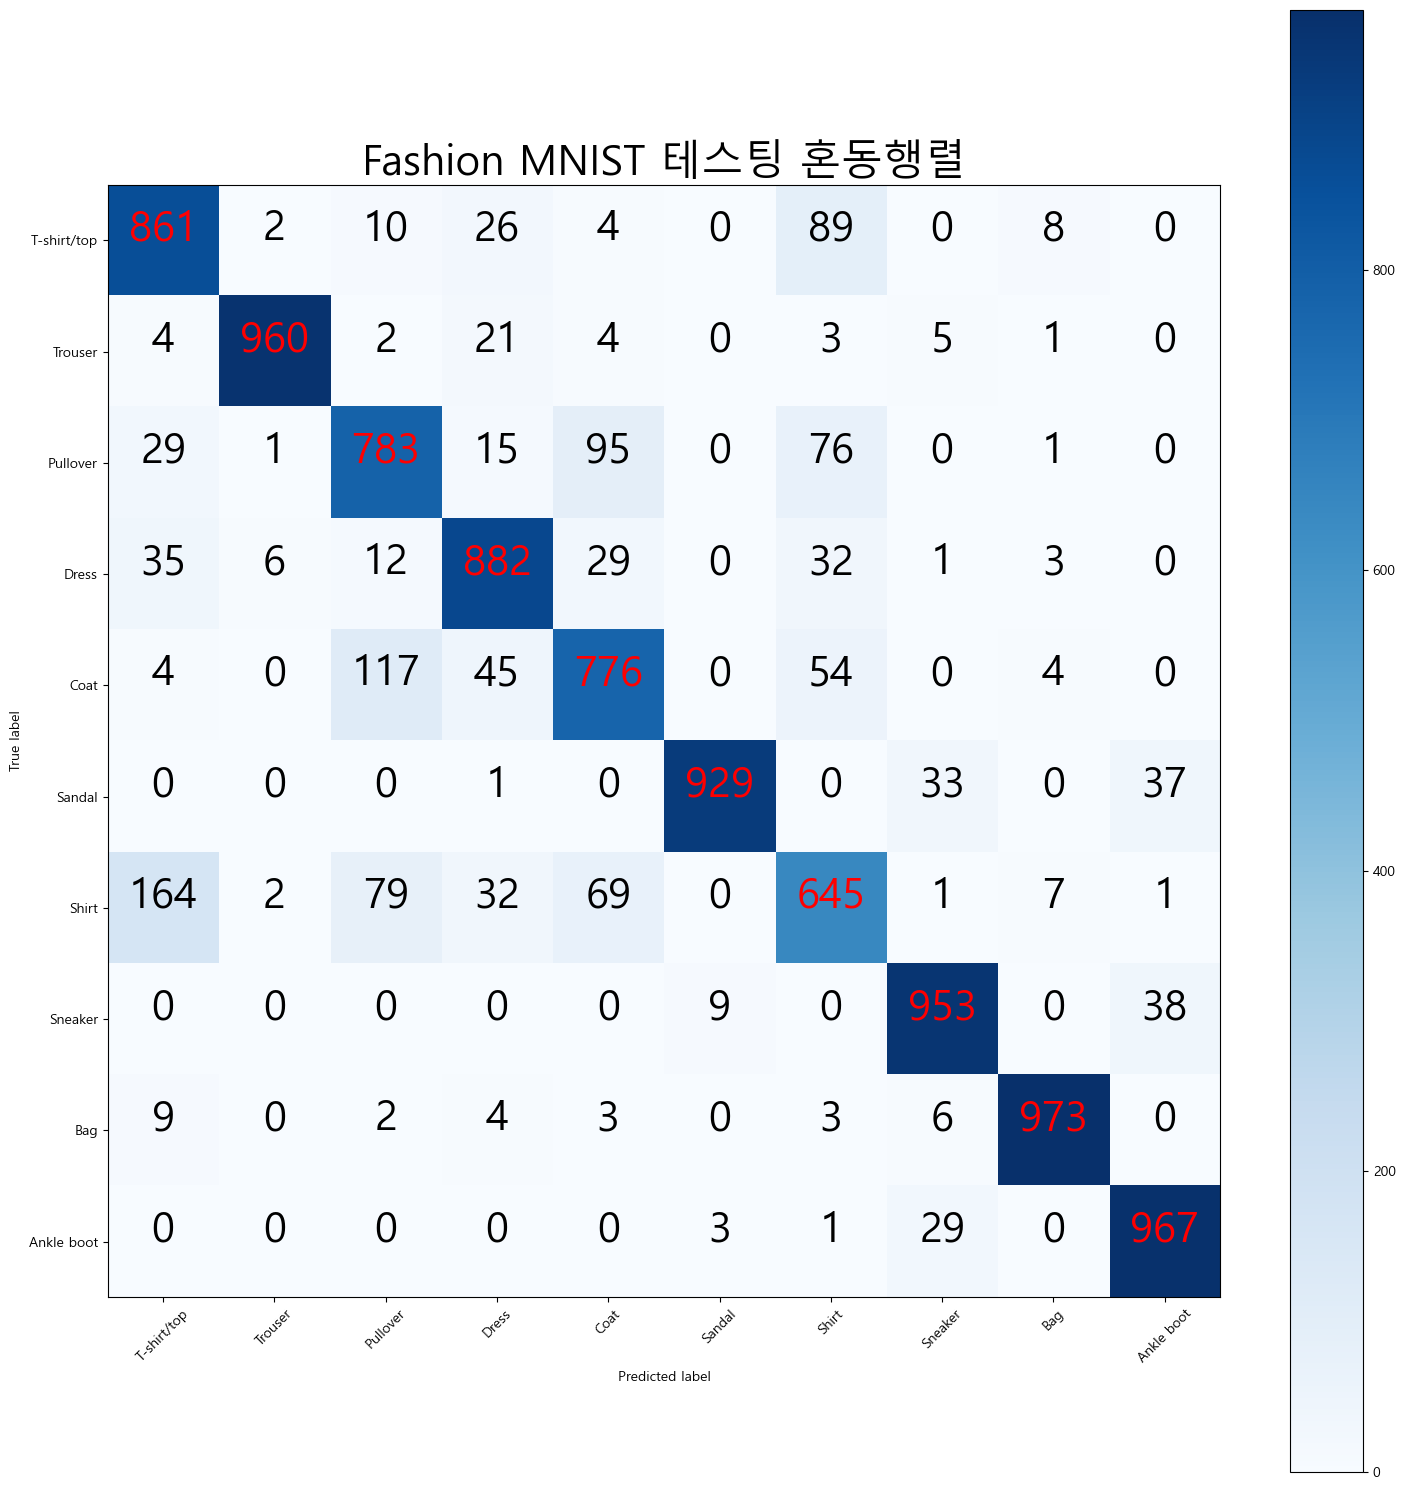

In [29]:
confusion_matrix = confusion_matrix(y_pred=model.predict(test_dataset.data.numpy().reshape(10000,-1)),
                                    y_true=test_dataset.targets.numpy())
plot_confusion_matrix(cm = confusion_matrix, classes=dataset.classes,
                      title='Fashion MNIST 테스팅 혼동행렬')

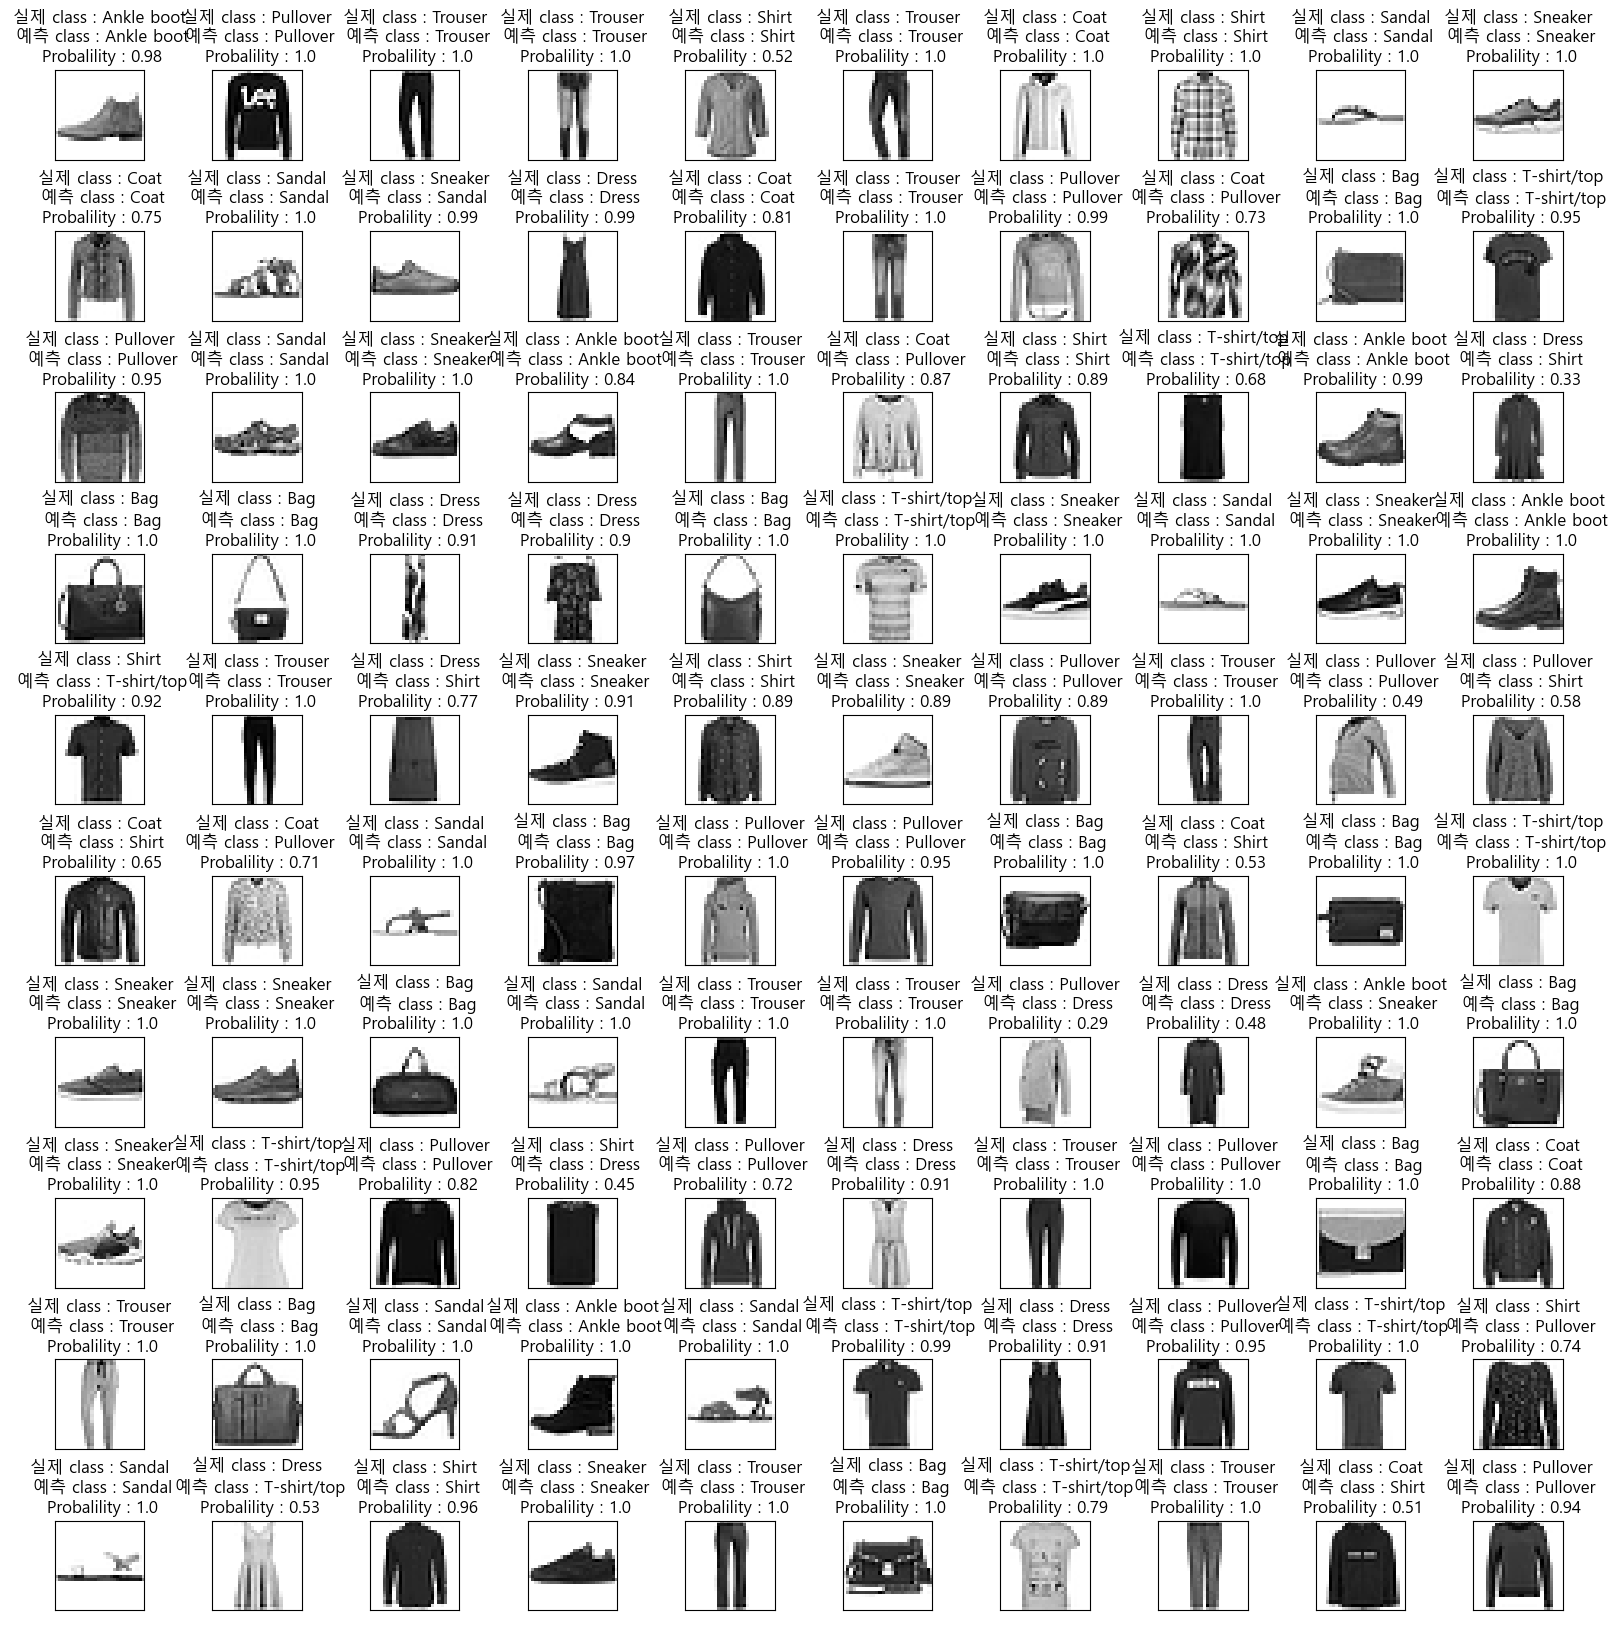

In [32]:
for_visualization_test_x = test_dataset.data.numpy()[:100]
for_visualization_test_y = test_dataset.targets.numpy()[:100]
f, axs = plt.subplots(10,10, figsize=(20,20))
plt.subplots_adjust(hspace=0.8)

for i in range(10):
    for j in range(10):
        
        x_data = for_visualization_test_x[10*i+j]
        y_data = for_visualization_test_y[10*i+j]
        real_class = dataset.classes[y_data]
        predicted_class = dataset.classes[np.argmax(model.predict_proba(x_data.reshape(1,-1)))]
        predicted_prob = np.max(model.predict_proba(x_data.reshape(1,-1))).round(2)
        
				# x,y 축의 지점 표시를 안함
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
        
        #subplot 의 제목을 i번째 결과에 해당하는 숫자로 설정
        axs[i,j].set_title(f"실제 class : {real_class}\n 예측 class : {predicted_class}\n Probalility : {predicted_prob}")
        
				# 입력으로 사용한 i번째 테스트 이미지를 28*28로 재배열하고
				# 이 2차원 배열을 그렝스케일 이미지로 출력
        axs[i,j].imshow(x_data.reshape((28,28)),cmap=plt.cm.gray_r)
        
plt.show()